<a href="https://colab.research.google.com/github/nafiul-araf/Lab-work/blob/main/Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### ***Loading The Data***

In [1]:
import pandas as pd
import numpy as np

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
df=pd.read_csv('/content/gdrive/MyDrive/CSE-464(Project)/Copy of Depression and Happiness Factor Analysis.csv')

In [3]:
df.shape

(920, 21)

### ***Data Preparation***

In [4]:
df=df.drop(['Timestamp','Unnamed: 20'],axis=1)
df.shape

(920, 19)

In [5]:
df=df.set_index('Which year are you in?')
#df.head()

In [6]:
df_numeric=df.drop(df.iloc[:, [0,2,4,5,6,8,9,10,11,12,13,14,15,16]],axis=1)
#df_numeric.head(1)

In [7]:
df_non_numeric=df.drop(df.iloc[:, [1,3,7,17]],axis=1)
#df_non_numeric.head(1)

In [8]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [9]:
encode=df_non_numeric.apply(le.fit_transform)
#encode.head()

In [10]:
df_final=pd.concat([encode,df_numeric],axis=1)
#df_final.head(3)

In [11]:
df_final.shape

(920, 18)

### ***Feature Selection***

In [12]:
X=df_final.drop('How are you feeling right now?',axis=1)
y=df_final['How are you feeling right now?']

In [14]:
from sklearn.feature_selection import mutual_info_classif

In [15]:
imp=mutual_info_classif(X,y)

In [16]:
feat_imp=pd.Series(imp,df_final.columns[0:len(df_final.columns)-1])

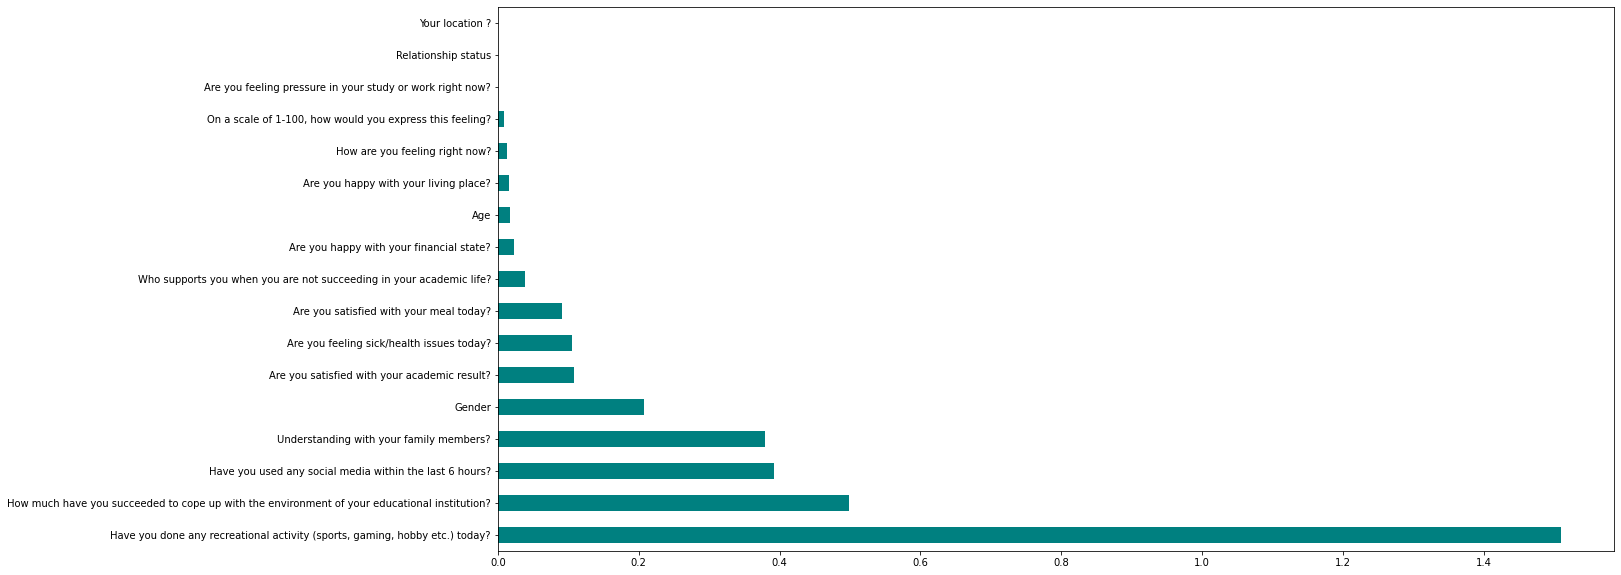

In [17]:
from matplotlib import pyplot as plt
%matplotlib inline

feat_imp.sort_values(ascending=False).plot(kind='barh',color='teal',figsize=(20,10))
plt.show()

In [18]:
from sklearn.feature_selection import SelectPercentile

In [19]:
select=SelectPercentile(mutual_info_classif,percentile=30)

In [20]:
select.fit(X,y)

SelectPercentile(percentile=30,
                 score_func=<function mutual_info_classif at 0x7f5ab3605d90>)

In [21]:
X.columns[select.get_support()]

Index(['Your location ?',
       'Are you feeling pressure in your study or work right now?',
       'Are you satisfied with your meal today?',
       'On a scale of 1-100, how would you express this feeling?',
       'How long did you sleep last night?(in hours)'],
      dtype='object')

### ***Models***

Here I have used:
*   Decision Tree Classifier with both 'Gini' (Default) and 'Entropy', respectively.
*   Tuning The Best Parameter with both Grid Search CV and Randomized Search CV, respectively.



In [22]:
X_new=df_final[['Your location ?','Are you feeling pressure in your study or work right now?','Are you satisfied with your meal today?','On a scale of 1-100, how would you express this feeling?','How long did you sleep last night?(in hours)']]
y_new=df_final[['How are you feeling right now?']]

In [23]:
from sklearn.model_selection import train_test_split,cross_val_score,KFold

***Decision Tree Classifier with Gini***

In [24]:
from sklearn.tree import DecisionTreeClassifier

In [25]:
dt=DecisionTreeClassifier()

In [27]:
X_train,X_test,y_train,y_test=train_test_split(X_new,y_new,test_size=0.20,stratify=y_new,random_state=21)

In [28]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [29]:
y_pred_dt_train=dt.predict(X_train)

In [30]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [31]:
accuracy_score(y_train,y_pred_dt_train)

0.9836956521739131

In [32]:
y_pred_dt_test=dt.predict(X_test)

In [33]:
accuracy_score(y_test,y_pred_dt_test)

0.9728260869565217

In [34]:
print(confusion_matrix(y_test,y_pred_dt_test))

[[33  0  0  0  0]
 [ 0 38  1  0  0]
 [ 0  3 33  0  0]
 [ 0  0  0 33  0]
 [ 0  1  0  0 42]]


In [35]:
print(classification_report(y_test,y_pred_dt_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.90      0.97      0.94        39
           2       0.97      0.92      0.94        36
           3       1.00      1.00      1.00        33
           4       1.00      0.98      0.99        43

    accuracy                           0.97       184
   macro avg       0.98      0.97      0.97       184
weighted avg       0.97      0.97      0.97       184



***Decision Tree Classifier with Entropy***

In [36]:
dt_en=DecisionTreeClassifier(criterion='entropy')

In [37]:
dt_en.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [38]:
y_pred_dt_en_train=dt_en.predict(X_train)

In [39]:
accuracy_score(y_train,y_pred_dt_en_train)

0.9836956521739131

In [40]:
y_pred_dt_en_test=dt_en.predict(X_test)

In [41]:
accuracy_score(y_test,y_pred_dt_en_test)

0.9782608695652174

In [42]:
print(confusion_matrix(y_test,y_pred_dt_en_test))

[[33  0  0  0  0]
 [ 0 39  0  0  0]
 [ 0  3 33  0  0]
 [ 0  0  0 33  0]
 [ 0  1  0  0 42]]


In [43]:
print(classification_report(y_test,y_pred_dt_en_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.91      1.00      0.95        39
           2       1.00      0.92      0.96        36
           3       1.00      1.00      1.00        33
           4       1.00      0.98      0.99        43

    accuracy                           0.98       184
   macro avg       0.98      0.98      0.98       184
weighted avg       0.98      0.98      0.98       184



### ***Hyperparameter Tuning***

***Gridsearch CV***

In [44]:
from sklearn.model_selection import GridSearchCV

In [59]:
params={
    'max_depth':[5,1],
    'min_samples_leaf':[1,2],
    'criterion':['gini','entropy']
}

In [60]:
tree_grid=DecisionTreeClassifier()

In [61]:
grid_cv=GridSearchCV(tree_grid,params,cv=KFold(n_splits=10,shuffle=True))

In [62]:
grid_cv.fit(X_new,y_new)

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=True),
             error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             pa

In [63]:
print("Tuned Decision Tree Parameters: {}".format(grid_cv.best_params_))

Tuned Decision Tree Parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 2}


In [64]:
print("Best score is {}".format(grid_cv.best_score_))

Best score is 0.9695652173913043


***Randomizedsearch CV***

In [65]:
from sklearn.model_selection import RandomizedSearchCV

In [66]:
params_random={
    'max_depth':[5,1],
    'min_samples_leaf':[1,2],
    'criterion':['gini','entropy']
}

In [67]:
tree_random=DecisionTreeClassifier()

In [68]:
random_cv=RandomizedSearchCV(tree_random,params_random,cv=KFold(n_splits=10,shuffle=True))

In [69]:
random_cv.fit(X_new,y_new)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


RandomizedSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=True),
                   error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
            

In [70]:
print("Tuned Decision Tree Parameters: {}".format(random_cv.best_params_))

Tuned Decision Tree Parameters: {'min_samples_leaf': 2, 'max_depth': 5, 'criterion': 'gini'}


In [71]:
print("Best score is {}".format(random_cv.best_score_))

Best score is 0.9695652173913045


### ***Summary***

In [72]:
print("\n All are looks almost same, no variation.\n")


 All are looks almost same, no variation.

